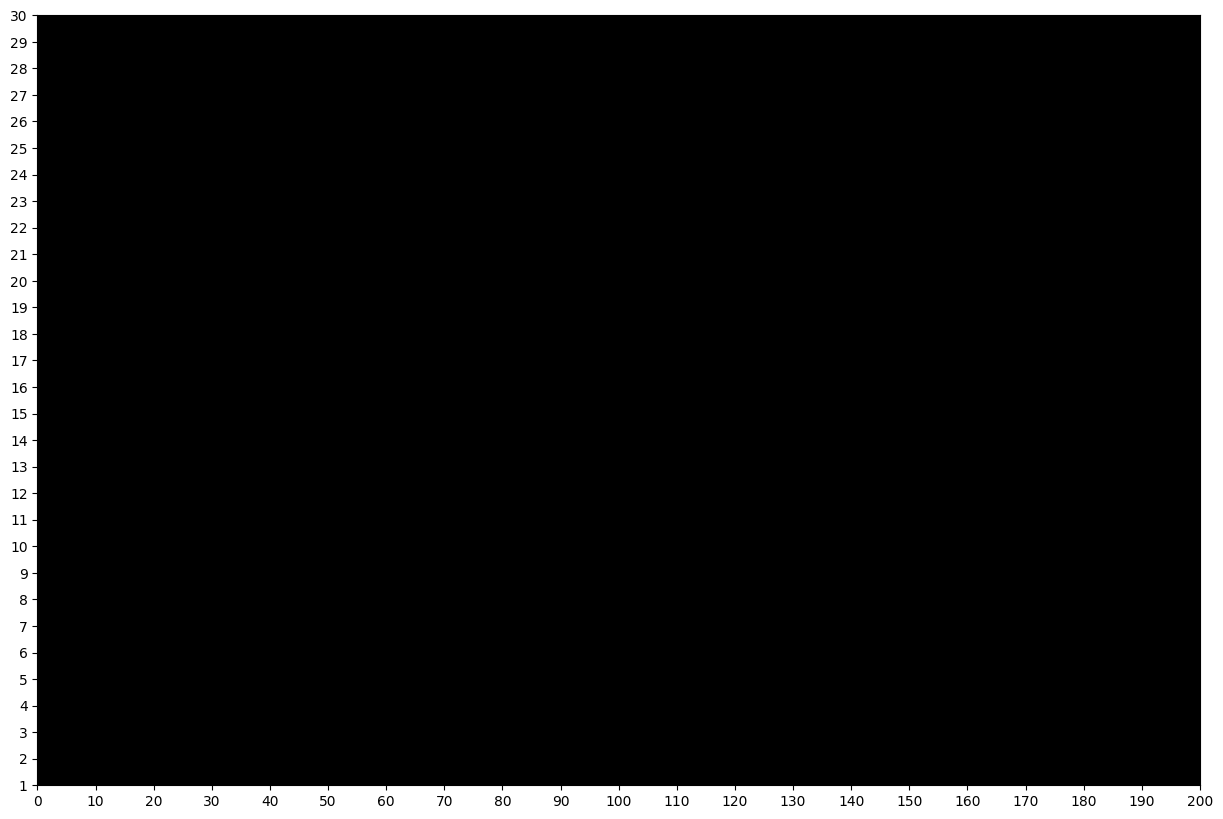

In [87]:
import pywt
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0, 1, 200)

# Finding signal by adding three different signals
signal = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7 * (t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
scales = np.arange(1, 31)  # No. of scales

coef, freqs = pywt.cwt(signal, scales, 'gaus1')  # Finding CWT using gaussian wavelet

# Plotting scalogram
plt.figure(figsize=(15, 10))
plt.imshow(abs(coef), extent=[0, 200, 30, 1], interpolation='bilinear', cmap='bone',
           aspect='auto', vmax=abs(coef).max(), vmin=abs(coef).max())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1, 31, 1))
plt.xticks(np.arange(0, 201, 10))
plt.show()

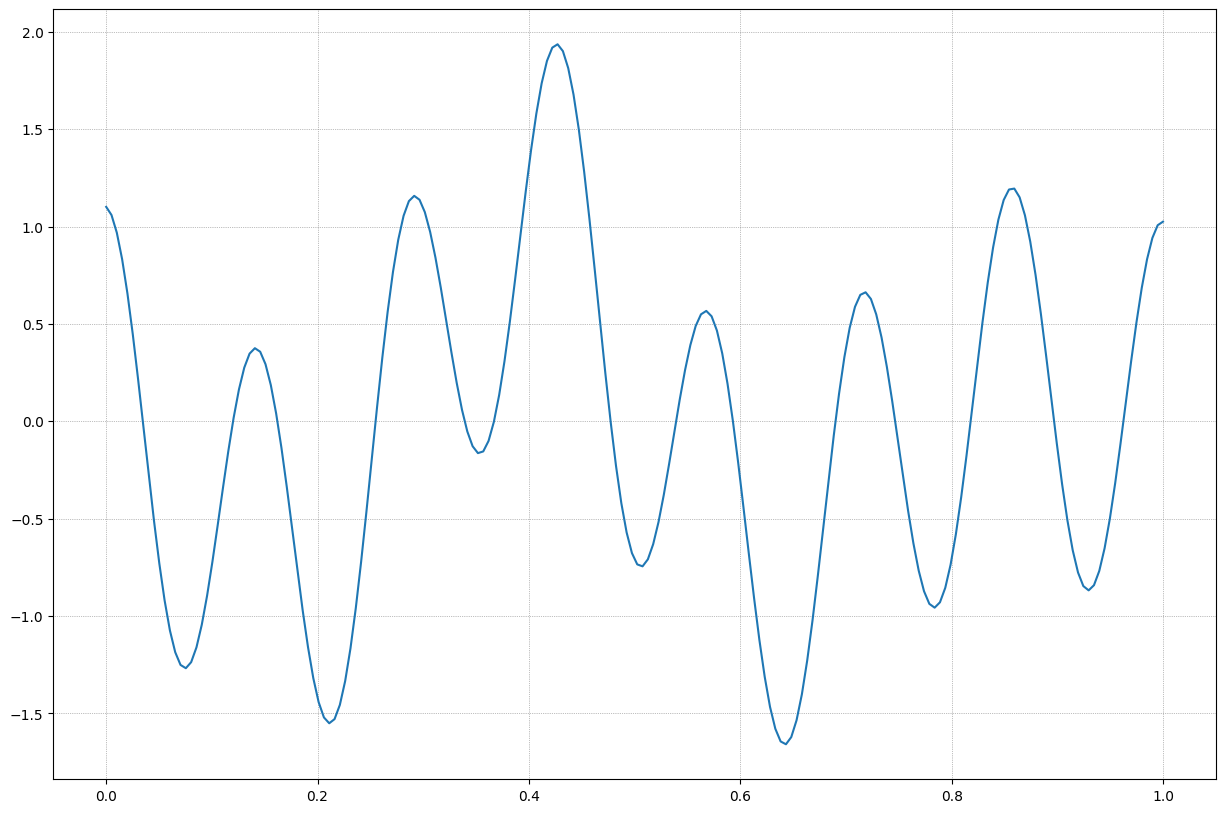

In [88]:
# Plotting
plt.figure(figsize=(15, 10))
plt.plot(t, signal)
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.show()

In [89]:
from scipy.io import loadmat

data = loadmat('data/ceoae/ceoae50g130rs20.mat')

signal = data['click50'].flatten()
fs = data['fs'][0]


28.544243577545195
1051


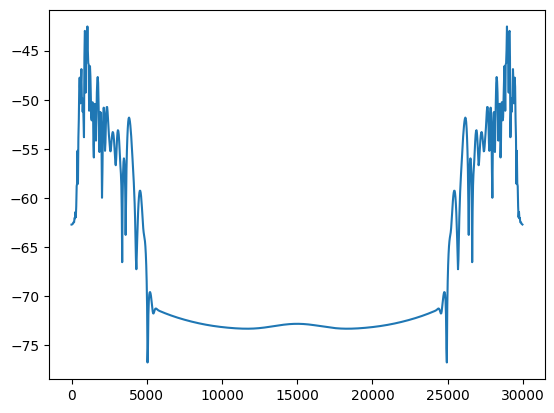

In [92]:


#fs = 44100 # sampling frequency
#t = np.arange(0,0.1,1/fs)
t = np.arange(0,len(signal)/fs,1/fs)

# Finding signal by adding three different signals
#signal = np.cos(2 * np.pi * 1000 * t)# + np.real(np.exp(-7 * (t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))


dt = 1/fs
Nt = len(t)
fx = np.arange(Nt)*fs/Nt   # frequency axis
df = fx[1]-fx[0]

print(df)
print(Nt)
Nw = Nt//2  # number of wavelet filters

def mother_wavelet(Nw,Nt,df,dt):
    vlnky = np.zeros((Nt,Nw))
    tx = (np.arange(Nt)-Nw)*dt
    for k in range(Nw):
        vlnky[:,k] = np.exp(2*np.pi*1j*k*df*tx)*np.exp(-k*2*np.pi*df*tx**2)
    return vlnky

def mother_wavelet2(Nw,Nt,df,dt):
    vlnky = np.zeros((Nt,Nw))
    tx = (np.arange(Nt)-Nw)*dt
    for k in range(Nw):
        vlnky[:,k] = np.cos(2*np.pi*k*df*tx)*1/(1+(0.075*k*2*np.pi*df*tx)**4)
    return vlnky

vlnky = mother_wavelet2(Nw,Nt,df,dt)

#plt.plot(np.real(vlnky[:,1000]))

spectrum = np.fft.fft(signal)
fig,ax = plt.subplots()
ax.plot(fx, 20*np.log10(np.abs(spectrum)))




In [ ]:
# plt.plot(np.abs(coefwti[100,:]))


In [ ]:
# np.shape(svlnky)

# np.shape(ssignal)

In [ ]:
# plt.plot(np.abs(coefwti[:,300]))

/var/folders/fz/ndx_k62d41b6y6rqvtzz7d9w0000gn/T/ipykernel_11089/2642137755.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  svlnky[:,k] = np.fft.fft(vlnky[:,k])/Nt
/var/folders/fz/ndx_k62d41b6y6rqvtzz7d9w0000gn/T/ipykernel_11089/2642137755.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  coefwt[:,k] = svlnky[:,k]*ssignal
/var/folders/fz/ndx_k62d41b6y6rqvtzz7d9w0000gn/T/ipykernel_11089/2642137755.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  coefwti[:,k] = np.fft.ifft(coefwt[:,k])


525
(1051, 525)


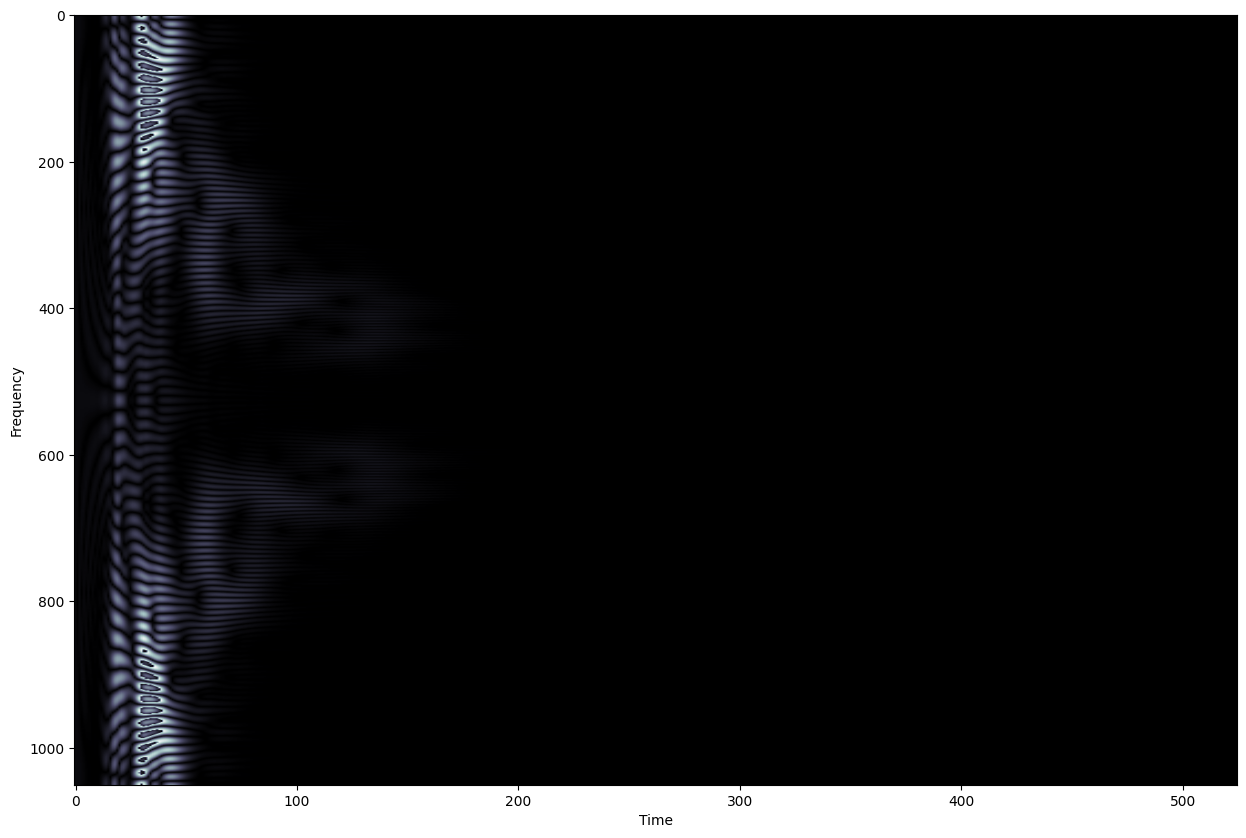

In [ ]:
svlnky = np.zeros_like(vlnky)
for k in range(Nw):
    svlnky[:,k] = np.fft.fft(vlnky[:,k])/Nt

ssignal = np.fft.fft(signal)/Nt

coefwt = np.zeros_like(svlnky)
for k in range(Nw):
    coefwt[:,k] = svlnky[:,k]*ssignal

coefwti = np.zeros_like(coefwt)
for k in range(Nw):
    coefwti[:,k] = np.fft.ifft(coefwt[:,k])
    
plt.figure(figsize=(15, 10))
abscoef = 255*1e11*abs(coefwti)
img = abscoef.astype(np.uint8)
print(np.shape(img))


plt.imshow(img,interpolation='bilinear', cmap='bone',
           aspect='auto')
plt.xlabel("Time")
plt.ylabel("Frequency")
#plt.yticks(np.arange(1, 31, 1))
#plt.xticks(np.arange(0, 201, 10))
plt.show()

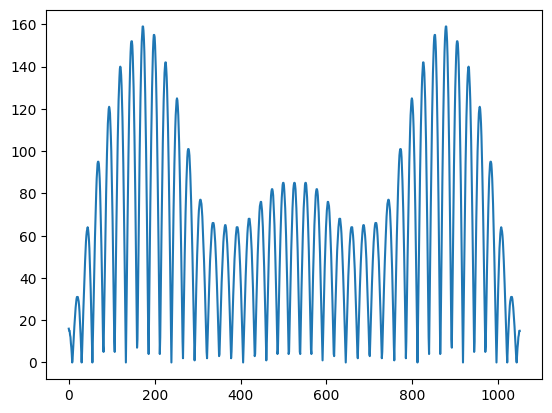

In [ ]:
plt.plot(img[:,20])

FILTERING COEFFICIENTS

In [ ]:
from scipy.signal import resample

# 1/2 * (2n - 1) * a * freq^(-b) < tau < 1/2 * (2n + 1) * a * freq^(-b)
a = 2000
b = 1
n = 10

lower_bound = 1/2 * (2*n - 1) * a * fx ** (-b)
upper_bound = 1/2 * (2*n + 1) * a * fx ** (-b)
tN_axis = np.arange(Nw)

# tN_axis_interp = np.interp(fx, tN_axis, np.arange(len(tN_axis)))

# Calculate decimation factor
decimation_factor = len(fx) // len(tN_axis)

# Resample y by averaging within each interval
decimated_freq = [np.mean(fx[i:i+decimation_factor])
               for i in range(0, len(fx), decimation_factor)]

print(decimated_freq)

# freq_interp = np.interp(tN_axis, fx, np.arange(len(fx)))

# t_filtered = tN_axis_interp[(tN_axis_interp < upper_bound) &
#                      (tN_axis_interp > lower_bound)]


lower_bound = 1/2 * (2*n - 1) * a * decimated_freq ** (-b)
upper_bound = 1/2 * (2*n + 1) * a * decimated_freq ** (-b)
t_filtered = tN_axis[(tN_axis < upper_bound) & (tN_axis > lower_bound)]                     


0.0 29971.455756422456
[14.272121788772598, 71.36060894386299, 128.44909609895336, 185.53758325404377, 242.62607040913417, 299.71455756422455, 356.8030447193149, 413.89153187440536, 470.9800190294957, 528.0685061845861, 585.1569933396765, 642.245480494767, 699.3339676498572, 756.4224548049476, 813.510941960038, 870.5994291151285, 927.6879162702189, 984.7764034253091, 1041.8648905803998, 1098.95337773549, 1156.0418648905804, 1213.1303520456709, 1270.218839200761, 1327.3073263558517, 1384.395813510942, 1441.4843006660324, 1498.5727878211228, 1555.661274976213, 1612.7497621313037, 1669.8382492863939, 1726.9267364414843, 1784.0152235965747, 1841.103710751665, 1898.1921979067556, 1955.2806850618458, 2012.3691722169362, 2069.4576593720267, 2126.5461465271173, 2183.634633682207, 2240.7231208372978, 2297.8116079923884, 2354.9000951474786, 2411.988582302569, 2469.0770694576595, 2526.1655566127497, 2583.25404376784, 2640.3425309229306, 2697.431018078021, 2754.519505233111, 2811.6079923882016, 28

/var/folders/fz/ndx_k62d41b6y6rqvtzz7d9w0000gn/T/ipykernel_11089/2178036216.py:8: RuntimeWarning: divide by zero encountered in reciprocal
  lower_bound = 1/2 * (2*n - 1) * a * fx ** (-b)
/var/folders/fz/ndx_k62d41b6y6rqvtzz7d9w0000gn/T/ipykernel_11089/2178036216.py:9: RuntimeWarning: divide by zero encountered in reciprocal
  upper_bound = 1/2 * (2*n + 1) * a * fx ** (-b)


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

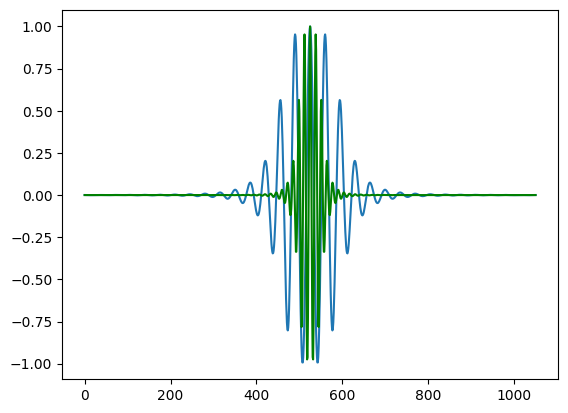

In [ ]:
plt.plot(np.real(vlnky[:,30]))
plt.plot(np.real(vlnky[:,80]), "g")